# On-line news popularity
                                Analytic Report and Research Proposal example
Report by Carlos Neves for [Thinkful](https://www.thinkful.com/)
### Aim:

Prepare an Analytic Report and Research Proposal that accomplishes these three goals:

  1. **Describe your dataset**: Describe and explore your dataset in the initial section of your Report. 
    * What does your data contain and what is its background? 
    * Where does it come from? 
    * Why is it interesting or significant? 
    * Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.


  2. **Ask and answer analytic questions**: Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviours or comparisons of the population.


  3. **Propose further research**: Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.


In [1]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import datetime as dt
from scipy.stats import ttest_ind
from IPython.display import Markdown, display

# Magics
%matplotlib inline

## 1. Dataset description:

### 1.1 Overall description

#### 1.1.1 Relevance
Due to the Web expansion, there has been a growing interest in on-line news, which allows an easy and fast spread of information around the globe. Predicting the popularity of such news is of value to improve exposure and information dissemination for authors, content providers, advertisers and even activists/politicians. 

#### 1.1.2 Source
The data used for this report is the [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) dataset from the University of California, Irvine (UCI) [Machine Learning repository](http://archive.ics.uci.edu/ml/index.php). The data was generated by K. Fernandes, P. Vinagre and P. Cortez for their 2015 study [*A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News*](https://link.springer.com/chapter/10.1007/978-3-319-23485-4_53).

As the rights to reproduce the articles and their content belongs to [Mashable](https://www.mashable.com), this dataset does not share the original content but some statistics associated with it. The news articles were scrapped and the data was acquired during  a  two  year  period,  from  January  7  2013  to  January  7  2015. 

#### 1.1.3 Features 

The features available in this dataset are divided into different groups:

  * **Words**: This group includes features referring to the numbers and rates of words in the article and title.
  * **Links**: This group refers counts of hyperlinks references present in the article.
  * **Digital media**: This group refers to the count of images and videos in the article.
  * **Time**: This group refers to the weekday of the article publication.
  * **Keywords**: This group includes the results of a keyword analysis and article categories.
  * **Natural language processing**: This group includes the results of a subjectivity, polarity and similarity analyses.
  * **Target**: Number of article shares

In [2]:
#Load data 
news = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

news.columns = news.columns.str.strip()
print('Number of features in the dataset: %d\nNumber of samples in the dataset: %d \n' %  news.shape)
print('List of feature names in the data set:\n\n* %s' % '\n* '.join(news.columns.values))

news.sample(10)

Number of features in the dataset: 39644
Number of samples in the dataset: 61 

List of feature names in the data set:

* url
* timedelta
* n_tokens_title
* n_tokens_content
* n_unique_tokens
* n_non_stop_words
* n_non_stop_unique_tokens
* num_hrefs
* num_self_hrefs
* num_imgs
* num_videos
* average_token_length
* num_keywords
* data_channel_is_lifestyle
* data_channel_is_entertainment
* data_channel_is_bus
* data_channel_is_socmed
* data_channel_is_tech
* data_channel_is_world
* kw_min_min
* kw_max_min
* kw_avg_min
* kw_min_max
* kw_max_max
* kw_avg_max
* kw_min_avg
* kw_max_avg
* kw_avg_avg
* self_reference_min_shares
* self_reference_max_shares
* self_reference_avg_sharess
* weekday_is_monday
* weekday_is_tuesday
* weekday_is_wednesday
* weekday_is_thursday
* weekday_is_friday
* weekday_is_saturday
* weekday_is_sunday
* is_weekend
* LDA_00
* LDA_01
* LDA_02
* LDA_03
* LDA_04
* global_subjectivity
* global_sentiment_polarity
* global_rate_positive_words
* global_rate_negative_words
*

url  timedelta  \
5189   http://mashable.com/2013/04/10/turkish-airline...      638.0   
38986  http://mashable.com/2014/12/16/apple-halts-onl...       22.0   
27919  http://mashable.com/2014/06/27/world-cup-niger...      194.0   
4789   http://mashable.com/2013/04/03/anniversary-of-...      645.0   
18998  http://mashable.com/2014/01/17/putin-olympics-...      356.0   
28792  http://mashable.com/2014/07/12/subscription-bu...      179.0   
37970  http://mashable.com/2014/12/01/i-think-i-got-m...       37.0   
20257  http://mashable.com/2014/02/11/parking-ticket-...      331.0   
33973  http://mashable.com/2014/10/03/donetsk-airport...       96.0   
37147  http://mashable.com/2014/11/17/united-terminal...       50.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
5189             13.0             150.0         0.716216               1.0   
38986            10.0             979.0         0.429744               1.0   
27919             9.0            1006.0         0.452429               1.0   
4789              9.0             234.0         0.660550               1.0   
18998            12.0             415.0         0.567089               1.0   
28792            15.0             495.0         0.561587               1.0   
37970            12.0             251.0         0.615385               1.0   
20257             8.0             177.0         0.685714               1.0   
33973            10.0             315.0         0.559727               1.0   
37147            14.0             308.0         0.615894               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs   ...    \
5189                   0.833333        5.0             4.0       0.0   ...     
38986                  0.648598       12.0             1.0       1.0   ...     
27919                  0.628289       18.0             0.0       1.0   ...     
4789                   0.803030        5.0             2.0       1.0   ...     
18998                  0.726891        4.0             3.0       1.0   ...     
28792                  0.720930       10.0             5.0       9.0   ...     
37970                  0.771812        5.0             2.0       0.0   ...     
20257                  0.830357        3.0             2.0       1.0   ...     
33973                  0.696335       23.0             2.0      21.0   ...     
37147                  0.750000        8.0             3.0       1.0   ...     

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
5189                0.033333                   0.75              -0.200000   
38986               0.033333                   1.00              -0.417857   
27919               0.100000                   1.00              -0.186250   
4789                0.136364                   0.50              -0.212500   
18998               0.050000                   0.70              -0.293472   
28792               0.200000                   1.00              -0.456250   
37970               0.100000                   1.00              -0.033333   
20257               0.100000                   0.55              -0.175000   
33973               0.350000                   1.00              -0.162778   
37147               0.100000                   0.70              -0.137500   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
5189               -0.300000              -0.100000            0.666667   
38986              -1.000000              -0.125000            0.000000   
27919              -0.500000              -0.050000            0.926667   
4789               -0.400000              -0.050000            0.000000   
18998              -0.700000              -0.050000            0.550000   
28792              -1.000000              -0.125000            0.000000   
37970              -0.033333              -0.033333            1.000000   
20257              -0.250000              -0.100000            0.000000 

The provided data has been previously pre-processed by the authors:

  * The categorical *time* and *channel* features have been converted to binary features using 1-of-C encoding. These variables were decoded back to categorical values. 
  * Timedelta refers to the days the days between publication of the article and the acquisition of the dataset. Knowing that the data been acquired at January 8 2015, this feature can be converted to day of publication.
  * Some of the available features, particularly the *Natural language processing* group, refer to processed values that are not relevant for this particular report. As such, the dataset was simplified by excluding these feature before continuing.

In [3]:
# Make channels category
channels = [col for col in news.columns if 'data_channel' in col]
print('There are %d articles not associated with any channel.' % sum(news[channels].sum(axis=1) == 0))
print('There are %d articles associated with more than one channel.' % sum(news[channels].sum(axis=1) > 1))

news['channel'] = 'other'
for channel_id in channels: 
    news.loc[news[channel_id] == 1,'channel'] = channel_id.replace('data_channel_is_', '')

news = news.drop(channels, axis=1)

There are 6134 articles not associated with any channel.
There are 0 articles associated with more than one channel.


In [4]:
# Make weekday category
weekdays = [col for col in news.columns if 'weekday' in col]
print('There are %d articles not associated with any weekday.' % sum(news[weekdays].sum(axis=1) == 0))
print('There are %d articles associated with more than one weekday.' % sum(news[weekdays].sum(axis=1) > 1))

news['weekday'] = np.nan
for weekday_id in weekdays: 
    news.loc[news[weekday_id] == 1,'weekday'] = weekday_id.replace('weekday_is_', '')

news = news.drop(weekdays, axis=1)

There are 0 articles not associated with any weekday.
There are 0 articles associated with more than one weekday.


In [5]:
# Make publication date
dataset_date = dt.datetime.strptime('8 Jan 2015', '%d %b %Y')
news['publication_date'] = news['timedelta'].apply(lambda x: dataset_date - dt.timedelta(days=x))

In [6]:
# Extract article name from url
news['article_name'] = news['url'].replace(r'.*/(.*)/', '\\1', regex=True)
news['article_name'] = news['article_name'].replace(r'-', ' ', regex=True)

For this report, only a subset of features will be considered. These features are organised as follows:

  * **Words**: n_tokens_title, n_tokens_content
  * **Links**: num_hrefs
  * **Digital media**: num_imgs, 'num_videos
  * **Time**: weekday, publication
  * **Keywords**: num_keywords
  * **NLP**: rate_positive_words, rate_negative_words,
  * **Target**: shares 

In [7]:
# Simplify dataset
non_predictive = ['url']
words =['n_non_stop_words', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'average_token_length']
links = [ 'num_self_hrefs', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']
time = ['is_weekend', 'timedelta']
keywords = ['kw_min_min', 'kw_max_min','kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 
            'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']
NPL = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 
       'global_rate_positive_words', 'global_rate_negative_words', 'avg_positive_polarity', 
       'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 
       'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']

remove = non_predictive + words + links + time + keywords + NPL

news = news.drop(remove, axis=1)
news.columns.values

array(['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs',
       'num_videos', 'num_keywords', 'rate_positive_words',
       'rate_negative_words', 'shares', 'channel', 'weekday',
       'publication_date', 'article_name'], dtype=object)

#### 1.1.4 Bias
It is rarely possible to gather data from all elements of a population of interest. Instead, data scientists leverage the concept of randomness to gather a **representative sample** from the population. This random sampling creates a smaller sample of the population that is sufficiently similar to the population, allowing inference about the population characteristics from the observed sample. In practice, random sampling depends on perfect access to the population, otherwise the sample may differ from the population. Systematic differences between the sample and the population are known as **selection bias**. Consequently, *it is essential to ask if that sample is truly random* and close attention must be paid to the method used to collect the data to identify biases may be present because of that. In the current dataset, all on-line news data results from scraping a single website, which will result in biases associated with this website and will not be representative of the entire population of on-line news articles (and readers).

### 1.2. Summary statistics

Interpreting raw data becomes impossible as the number of samples and features increase. As such, data scientists takes the collected data about a sample and reduces its complexity into understandable and accurate summaries, known as *statistics*. Using the sample statistics it is possible to infer information (*statistical inference*) about the entire population from which the sample is taken.

#### 1.2.1 Central Tendency

The central tendency describes a point around which the values of a variable cluster. Central tendency can be measured in a number of ways: 
  * The mean ($\mu$), or *expected value* ($E[X]$), represents the average value within a variable. The mean is easy to understand and commonly used, but it's sensitive to extreme values.
  * The median represents the middle value in a variable when the values are ordered. Unlike the mean, the median is not sensitive to extreme values.
  * The mode represents the value in a variable that occurs the most frequently.


#### 1.2.2 Measures of variability

While measures of central tendency are important, on their own they are not enough to describe a variable. Another vital piece of information is the variability of the variable. A variable with high variability provides information about differences between observations that can be used to understand and predict future outcomes, while in cases of low variability, most samples are too similar to the central tendency, providing little new information about the concept being measured, but most accurate estimates.

  * The variance ($\sigma^{2}_{x}$) of a variable describes how much values differ from the central tendency (and how much they differ from each other). 
  
  * Because of its mathematical properties, the most common estimate of variability used by statisticians is the square root of the variance, called the standard deviation ($\sigma$).

  * Another useful estimate of variance is the standard error, which quantifies uncertainty in the estimate of the sample mean. While the standard deviation tells us about *variance in the population*, the standard error tells us about the *precision of our sample mean estimate*.

In [8]:
# Summary of categorical/date features
news.drop('article_name', axis=1).groupby('channel').describe(percentiles=[0.5], include=['object', 'datetime']).T

channel                                  bus        entertainment  \
publication_date count                  6258                 7057   
                 unique                  713                  714   
                 top     2013-05-20 00:00:00  2014-08-25 00:00:00   
                 freq                     22                   31   
                 first   2013-01-07 00:00:00  2013-01-07 00:00:00   
                 last    2014-12-31 00:00:00  2014-12-31 00:00:00   
weekday          count                  6258                 7057   
                 unique                    7                    7   
                 top               wednesday               monday   
                 freq                   1271                 1358   
                 first                   NaN                  NaN   
                 last                    NaN                  NaN   

channel                            lifestyle                other  \
publication_date count                  2099                 6134   
                 unique                  670                  721   
                 top     2013-02-14 00:00:00  2013-02-21 00:00:00   
                 freq                     13                   21   
                 first   2013-01-07 00:00:00  2013-01-07 00:00:00   
                 last    2014-12-31 00:00:00  2014-12-31 00:00:00   
weekday          count                  2099                 6134   
                 unique                    7                    7   
                 top               wednesday              tuesday   
                 freq                    388                 1111   
                 first                   NaN                  NaN   
                 last                    NaN                  NaN   

channel                               socmed                 tech  \
publication_date count                  2323                 7346   
                 unique                  644                  717   
                 top     2013-06-20 00:00:00  2014-01-06 00:00:00   
                 freq                     16                   49   
                 first   2013-01-07 00:00:00  2013-01-07 00:00:00   
                 last    2014-12-31 00:00:00  2014-12-31 00:00:00   
weekday          count                  2323                 7346   
                 unique                    7                    7   
                 top                thursday              tuesday   
                 freq                    463                 1474   
                 first                   NaN                  NaN   
                 last                    NaN                  NaN   

channel                                world  
publication_date count                  8427  
                 unique                  717  
                 top     2014-07-23 00:00:00  
                 freq                     34  
                 first   2013-01-07 00:00:00  
                 last    2014-12-31 00:00:00  
weekday          count                  8427  
                 unique                    7  
                 top                thursday  
                 freq                   1569  
                 first                   NaN  
                 last                    NaN

In [9]:
# Summary of numeric features
news.groupby('channel').describe(percentiles=[0.5], exclude=['object', 'datetime']).T

channel                              bus  entertainment      lifestyle  \
n_tokens_content    count    6258.000000    7057.000000    2099.000000   
                    mean      539.871365     607.457418     621.327299   
                    std       439.842121     528.951882     566.053186   
                    min         0.000000       0.000000       0.000000   
                    50%       400.000000     433.000000     502.000000   
                    max      6336.000000    6505.000000    8474.000000   
n_tokens_title      count    6258.000000    7057.000000    2099.000000   
                    mean       10.282039      11.001984       9.765603   
                    std         2.160168       2.087104       1.909371   
                    min         3.000000       2.000000       3.000000   
                    50%        10.000000      11.000000      10.000000   
                    max        19.000000      18.000000      18.000000   
num_hrefs           count    6258.000000    7057.000000    2099.000000   
                    mean        9.356184      10.689670      13.419247   
                    std         8.433127      12.920689      11.530559   
                    min         0.000000       0.000000       0.000000   
                    50%         7.000000       7.000000      10.000000   
                    max       122.000000     304.000000     145.000000   
num_imgs            count    6258.000000    7057.000000    2099.000000   
                    mean        1.808405       6.317699       4.904717   
                    std         3.494494      11.627069       8.150601   
                    min         0.000000       0.000000       0.000000   
                    50%         1.000000       1.000000       1.000000   
                    max        51.000000     128.000000     111.000000   
num_keywords        count    6258.000000    7057.000000    2099.000000   
                    mean        6.489613       6.924897       8.229633   
                    std         1.975308       1.900225       1.672311   
                    min         2.000000       2.000000       3.000000   
                    50%         6.000000       7.000000       8.000000   
                    max        10.000000      10.000000      10.000000   
num_videos          count    6258.000000    7057.000000    2099.000000   
                    mean        0.636465       2.545841       0.474988   
                    std         3.413863       6.225034       1.919922   
                    min         0.000000       0.000000       0.000000   
                    50%         0.000000       1.000000       0.000000   
                    max        75.000000      74.000000      50.000000   
rate_negative_words count    6258.000000    7057.000000    2099.000000   
                    mean        0.258300       0.305044       0.266885   
                    std         0.139169       0.154642       0.128471   
                    min         0.000000       0.000000       0.000000   
                    50%         0.250000       0.300000       0.258065   
                    max         1.000000       1.000000       1.000000   
rate_positive_words count    6258.000000    7057.000000    2099.000000   
                    mean        0.737705       0.666332       0.722634   
                    std         0.145889       0.185087       0.145890   
                    min         0.000000       0.000000       0.000000   
                    50%         0.750000       0.687500       0.737705   
                    max         1.000000       1.000000       1.000000   
shares              count    6258.000000    7057.000000    2099.000000   
                    mean     3063.018536    2970.487034    3682.123392   
                    std     15046.387626    7858.133920    8885.017375   
                    min         1.000000      47.000000      28.000000   
                    50%      1400.000000    1200.000000    1700.000000   
    

In [10]:
# Missing values
print('Are there any missing values in the data after pre-processing? %s' % ('Yes' if any(news.isnull().apply(sum)) else 'No'))

Are there any missing values in the data after pre-processing? No


### 1.3 Visualizations
A lot of information can be obtained from the summary statistics. For example, unclassified articles (others) show a number of tokens (broadly the equivalent to words) that is on average half of the other news channels, while the world channel is the one with most published news articles. In addition, the rate of positive words is on average higher than that of negative words, but a higher rate of negative words is used on the entertainment and world channels. The number of shares is also interesting to explore, where a clear difference between the average and median shares is obvious, indication a very (positive) skewed distribution with some extreme highly shared articles. 

However, reading and comparing statistics can be difficult and cumbersome as the number of features increase and as their relationships become more complex. Visualizations allows to easily explore the distribution of data, identify anomalous or otherwise extreme data points, determine which features are key factors and define how to approach the problem. As such, visualisations are often the first step in investigating how variables are behaving (but also play a key role in the evaluation of later analyses, particularly model building). 

Every type of chart of graph or visual is best suited to a specific context. There are several visualization forms, each with their own particular benefits.

In [11]:
# Example of defining a Python class: the Plotter class will set up an object specialised for plotting the data
class Plotter():
    '''
    Object class that takes the pandas data frame containing the data for plotting at instantiation,
    allows to set plotting parameters and 
    then produces a grid of plots for a given plot type.
    '''
    
    def __init__(self, df):
        '''
        Object generator
        Takes data frame as argument and assigns it as an object attribute.
        Defines available arguments/codes for selection plotting methods
        '''
        self.df = df
       
        self.plot_type = {'line': self._line,
                     'scatter': self._scatter,
                     'box': self._box,
                     'hist': self._hist,
                     'qq': self._qq}
        
    def set_params_idx(self, x=None, y=None, 
                       split_var=None, subset=None, distribution=None,
                       colour=None, num_plots=None, ncols=3):
        '''
        Takes a number of parameters as arguments and assigns them to the object as attributes 
        which are used by the plotting methods. 
        
        See individual plotting methods (as defined by the type attribute) for information on the 
        required parameters.
        
         * num_plots: Number of plot to be made. By default extracts the information from x, y, colour or subset arguments.
         * ncols: Number of columns to be used for the plotting grid. By default set to 3.
        '''
        
        # Set data features corresponding to each axes       
        self.x = x
        self.y = y
        
        # Set values for categories (line plot only)
        self.var = split_var
        self.set = self.df[self.var].unique() if subset is None and self.var is not None else subset
        
        # Define number of plots to make 
        if num_plots == None: num_plots = max([len(i) if isinstance(i, (list, tuple)) else len([i]) for i in [x, y, colour, self.set ] if i is not None])
        self.n = num_plots
        
              
        # Automatically assign plots to grid position
        # and define where x and y labels should be placed
        if ncols > self.n: ncols = num_plots
        nrows = -(-self.n // ncols)
        self.dim = (nrows,ncols)
        grid = self.dim[0] * self.dim[1]
        
        self.labs = np.arange(self.dim[0],0,-2) * self.dim[1]
        self.labs = self.labs[: (grid - self.n)] 
        
        self.labs = (np.arange(self.dim[0])+1) * self.dim[1]
        self.labs = self.labs[np.append(np.arange(len(self.labs),0,-2), 
                                        np.arange(len(self.labs)-1,0,-2))-1]
        self.labs = self.labs[:(grid-self.n)]
        
        self.pos = []
        for i in range(1, grid+1):
            if i not in self.labs:
                if i not in [idx for i in self.labs for idx in range(i-self.dim[1]+1, i)]: self.pos.append((self.dim[0], self.dim[1], i))
                else: self.pos.append((self.dim[0], self.dim[1]-1, i-i//self.dim[1]))
                    
        self.labs = [side - sum(side >= self.labs) for side in np.arange(0,self.n, self.dim[1])]
        
        # Other parameters: colours for plotting (all) and distribution (QQ-plot) to be used
        self.col = colour if colour is not None else ['black'] * self.n
        self.dist = distribution if isinstance(distribution, (list, tuple)) else [distribution] * self.n
                    

    def plot(self, method):
        '''
        Method called to generate plots.
        Takes plot type as argument and calls the appropriate plotting method 
        as defined by the type attribute
        '''
        
        # Set layout
        plt.figure(figsize=(self.dim[1]*7.5,self.dim[0]*7.5))
        plt.tight_layout()
        
        # Plot on grid
        for i in range(self.n):
            plt.subplot(self.pos[i][0],
                        self.pos[i][1],
                        self.pos[i][2])
            
            self.plot_type[method.lower()](i)
        
        # Show plot
        plt.show()

    def _line(self, i):
        '''
        Private method to generate line plots
        Takes the plot number ID as argument to extract the correct information 
        from the object attributes:
        
         * x: Name of column to be plotted on the x-axis (required)
         * y: Name of column to be plotted on the y-axis (required)
         * split_var: If not None, defines the variable to be used for spliting the line plots. 
         * subset: Subset of the data based on the split_var to be used for each plot. By default uses all unique split_var values.
         * colour: Colours to be used for each plot. By default set to black.
        '''
        
        
        # Split data if self.var is defined
        df = self.df
        if not self.var is None: df = self.df[self.df[self.var] == self.set[i]]
        
        # Plot
        plt.plot(self.x,
                 self.y, 
                 data=df,
                 color=self.col[i])
        
        # Labels
        if i in self.labs: plt.ylabel('Number of shares')
        if i >= self.labs[-1]: plt.xlabel('Article publication date ')
        
        if not self.var is None: plt.title('Number of shares by publication date\nfor news channel ' + self.set[i])
        else:plt.title('Number of shares by ' + self.x.split('_'))
        
        # Limits to ensure comparable y values
        plt.ylim(min(self.df[self.y]), max(self.df[self.y]))
        
        
    def _scatter(self, i): 
        '''
        Private method to generate scatter plots
        Takes the plot number ID as argument to extract the correct information 
        from the object attributes:
        
         * x: Name of column to be plotted on the x-axis (required)
         * y: Name of column to be plotted on the y-axis (required)
         * colour: Colours to be used for each plot. By default set to black.
        '''
        
        # Plot 
        plt.scatter(
            x=self.x[i],
            y=self.y,
            data=self.df,
            color=self.col[i]
        )

        # Labels
        if i in self.labs: plt.ylabel('Number of shares')
        plt.xlabel(' '.join(self.x[i].split('_')).capitalize())
        plt.title('Number of shares by  ' + ' '.join(self.x[i].split('_')))

        
    def _box(self, i): 
        '''
        Private method to generate boxplots
        Takes the plot number ID as argument to extract the correct information 
        from the object attributes:
        
         * y: Name of column to be plotted on the y-axis (required)
        '''
        
        # Plot
        plt.boxplot(self.df[self.y[i]]) 

        # Labels
        plt.ylabel(' '.join(self.y[i].split('_')).capitalize())
        plt.xticks([])
        plt.title('IRQ of ' + ' '.join(self.y[i].split('_')))

    def _hist(self, i): 
        '''
        Private method to generate histograms.
        Takes the plot number ID as argument to extract the correct information 
        from the object attributes:
        
         * x: Name of column to be plotted on the x-axis (required)
         * colour: Colours to be used for each plot. By default set to black.
        '''
        
        # Plot
        plt.hist(self.df[self.x[i]], color=self.col[i], bins=50, alpha=.5) 

        # Add a vertical lines for mean and 1 sd
        plt.axvline(self.df[self.x[i]].mean(), color='r', linestyle='solid', linewidth=2)
        plt.axvline(self.df[self.x[i]].mean() + self.df[self.x[i]].std(), color='r', linestyle='dashed', linewidth=2)
        plt.axvline(self.df[self.x[i]].mean() - self.df[self.x[i]].std(), color='r', linestyle='dashed', linewidth=2) 

        # Labels
        if i in self.labs: plt.ylabel('Counts')
        plt.xlabel(' '.join(self.x[i].split('_')).capitalize())
        plt.title('Distribution of ' + ' '.join(self.x[i].split('_')))
        
    def _qq(self,i): 
        '''
        Private method to generate QQ plots
        Takes the plot number ID as argument to extract the correct information 
        from the object attributes:
        
         * x: Name of column to compare the distribution of (required)
         * distribution: baseline distribution to be compared with (required)
        '''
        
        # Define baseline distribution
        vals = self.df[self.x[i]]

        if self.dist[i].lower() == 'normal': dist = np.random.normal(vals.mean(), vals.std(), len(vals))
        elif self.dist[i].lower() == 'poisson': dist = np.random.poisson(vals.mean(), len(vals))
        elif self.dist[i].lower() == 'gamma': dist = np.random.gamma((vals.std()/vals.mean())**2,vals.std()/vals.mean()**2, len(vals))
        elif self.dist[i].lower() == 'binomial': dist = np.random.binomial((2*max(vals)), vals.mean()/(2*max(vals)),len(vals))
        elif self.dist[i].lower() == 'log': # pseudo log
            vals = np.log2(vals + 1 )
            dist = np.random.normal(vals.mean(), vals.std(), len(vals))
            self.dist[i] = 'Normal'
            self.x[i] = 'log2 ' + self.x[i] 

            
        # Sort values
        dist.sort()
        vals = vals.sort_values()
        
        # Define "non-truncated" points 
        trunc = np.logical_and(vals > np.min(vals) + np.ptp(vals) * 0.01, 
                                   vals < np.max(vals) - np.ptp(vals) * 0.01)

        # Plot
        plt.scatter(dist, vals, 
                    color = [self.col[i] if c else 'purple' for c in trunc]) 

        plt.plot((dist[trunc][0], dist[trunc][-1]), 
                (vals[trunc].iloc[0], vals[trunc].iloc[-1]), color='green')

        # Labels
        plt.ylabel(' '.join(self.x[i].split('_')).capitalize())
        plt.xlabel(self.dist[i] + ' quantiles')
        plt.title('QQ plot for ' + ' '.join(self.x[i].split('_')))


# Instantiate object
plot_obj = Plotter(news)

**Line plots**: *Line graphs are great for tracing out a trajectory over time or some other continuous measure.*

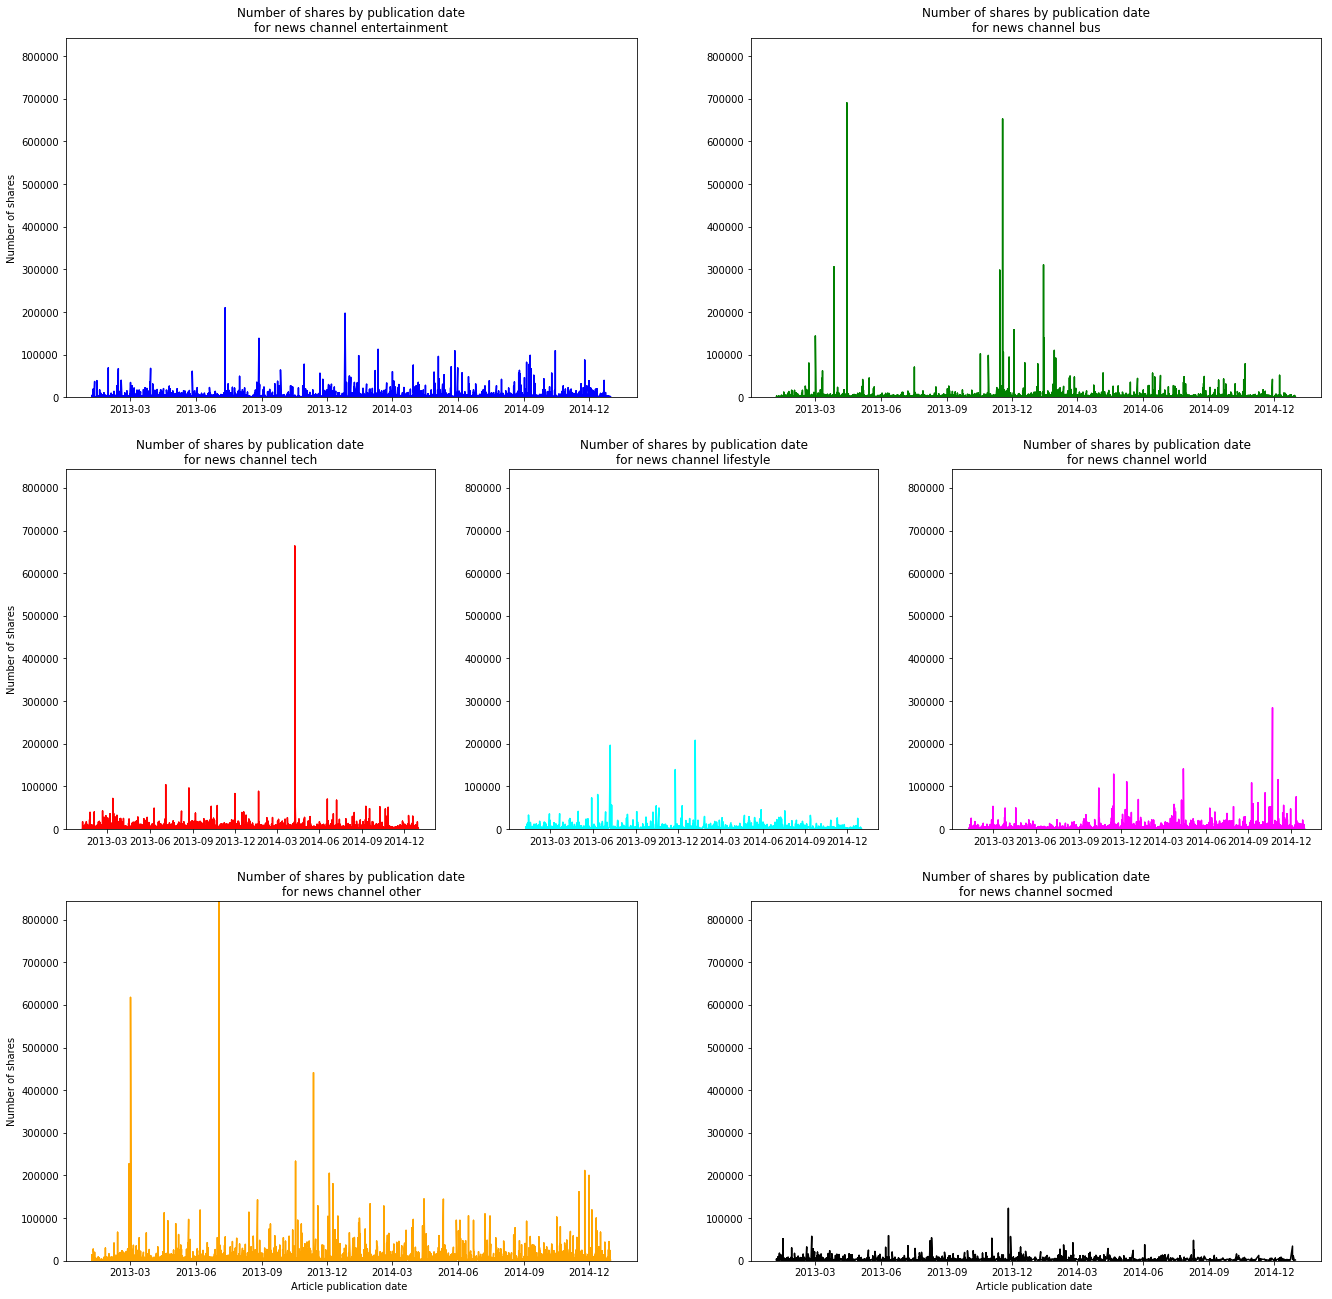

In [12]:
# Line plots 
plot_obj.set_params_idx(x='publication_date', 
                    y='shares', 
                    split_var='channel',
                    colour=['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'black'])

plot_obj.plot('line')

In [13]:
news[['article_name','channel','publication_date', 'shares']].sort_values(by='shares', ascending=False).head(10)

article_name channel publication_date  shares
9365                       low cost iphone   other       2013-07-03  843300
5370               dove ad beauty sketches     bus       2013-04-15  690400
23237  first 100 gilt soundcloud stitchfix    tech       2014-04-09  663600
16268           kanye west harvard lecture     bus       2013-11-18  652900
3145                     wealth inequality   other       2013-03-02  617900
16009                    roomba 880 review   other       2013-11-12  441000
18788            australia heatwave photos     bus       2014-01-14  310800
4506                  blackberry 1 million     bus       2013-03-28  306100
16113                     ibm watson brief     bus       2013-11-14  298400
35256          ebola cdc active monitoring   world       2014-10-23  284700

The line plots above represent the number of shares for each article by publication day for the different news channels. These plots show that the most shared articles are on the *business*, *tech* and *other* channels. These articles clearly show extremely higher shares than the remaining articles, as such, they could be associated with specific high-profile or high-impact events. The 10 most shared news articles are shown in the table include various tech/bus hype articles and the 2014 West Africa Ebola outbreak.

**Scatter plots**: *Scatter plots show the relationship between two variables.*

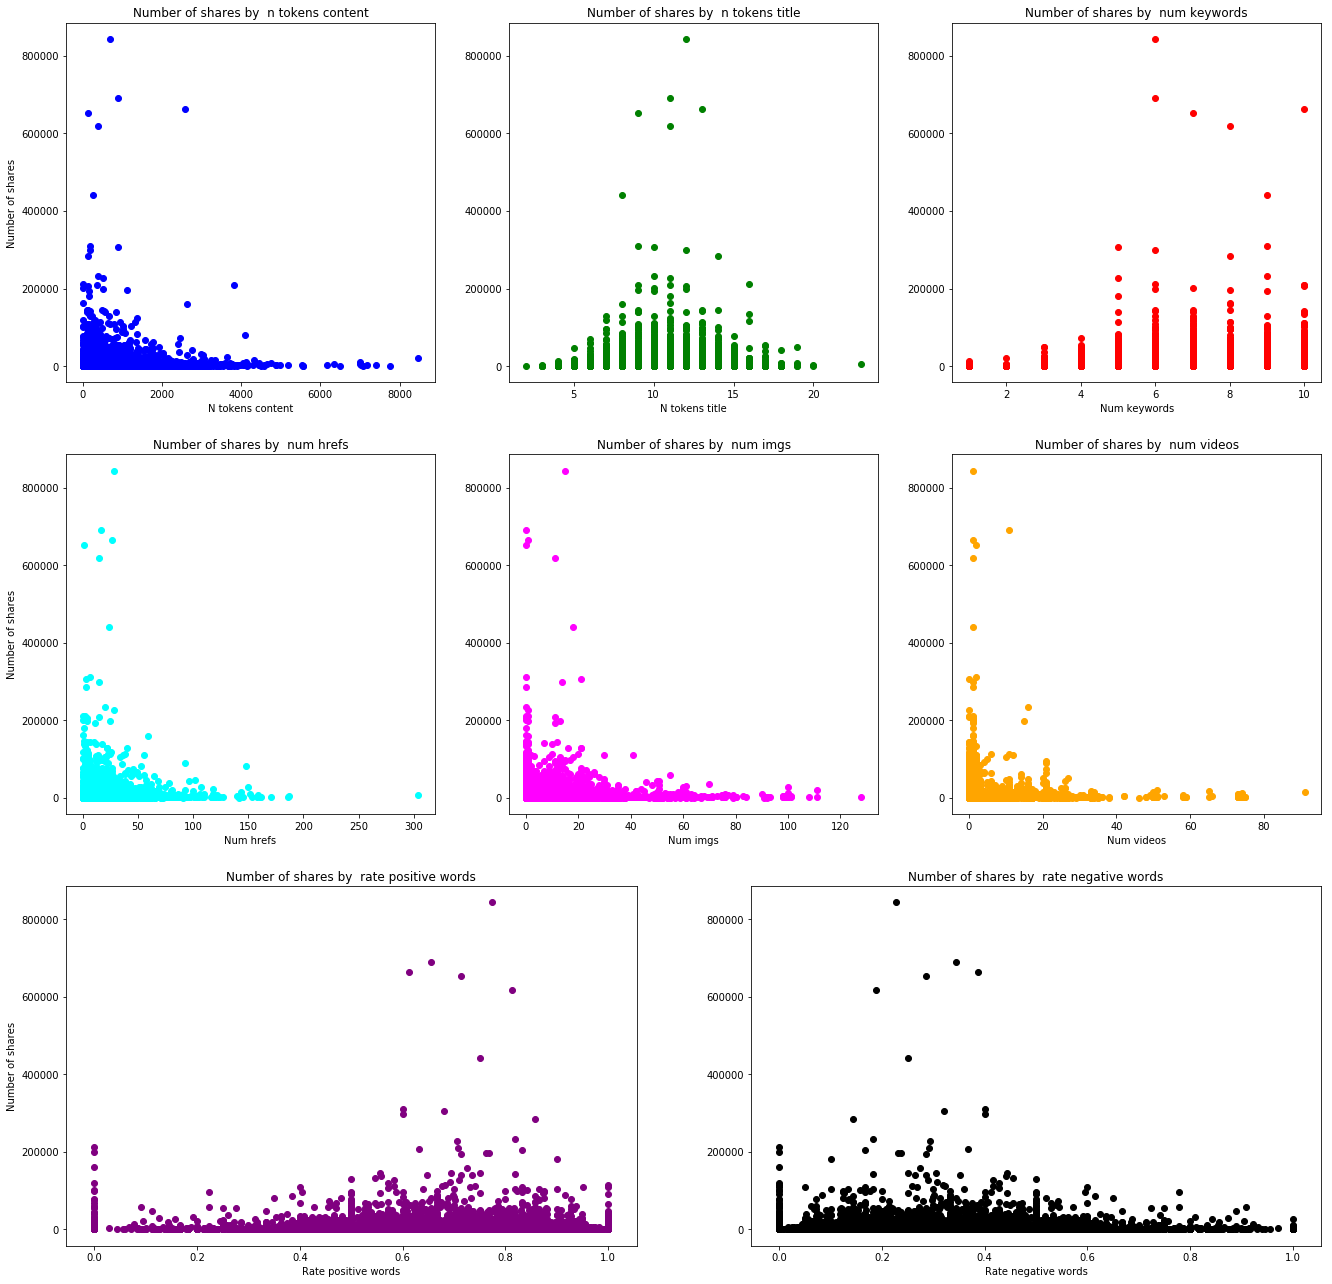

In [14]:
# Scatter plots
plot_obj.set_params_idx(x=['n_tokens_content', 'n_tokens_title', 'num_keywords', 
                          'num_hrefs','num_imgs', 'num_videos', 
                          'rate_positive_words', 'rate_negative_words'], 
                        y='shares', 
                        colour=['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'purple', 'black'])

plot_obj.plot('Scatter')

The scatter plots above show the relationship between various numerical features and article shares. There seems to be an optimal range for each feature that is associated with a noticeable peak of shares. News articles that were shared the most have smaller contents but and average title length and make more use of keywords. These articles also have less hyperlinks and digital content, and a higher rate of positive words than of negative words. Overall, it would seem that shorter, more positive articles with less media content tend to be shared more.

**Boxplot**: *Boxplots are are useful for investigating the range of the values of a feature and identifying possible outliers that warrant investigation and that may require special treatment.*

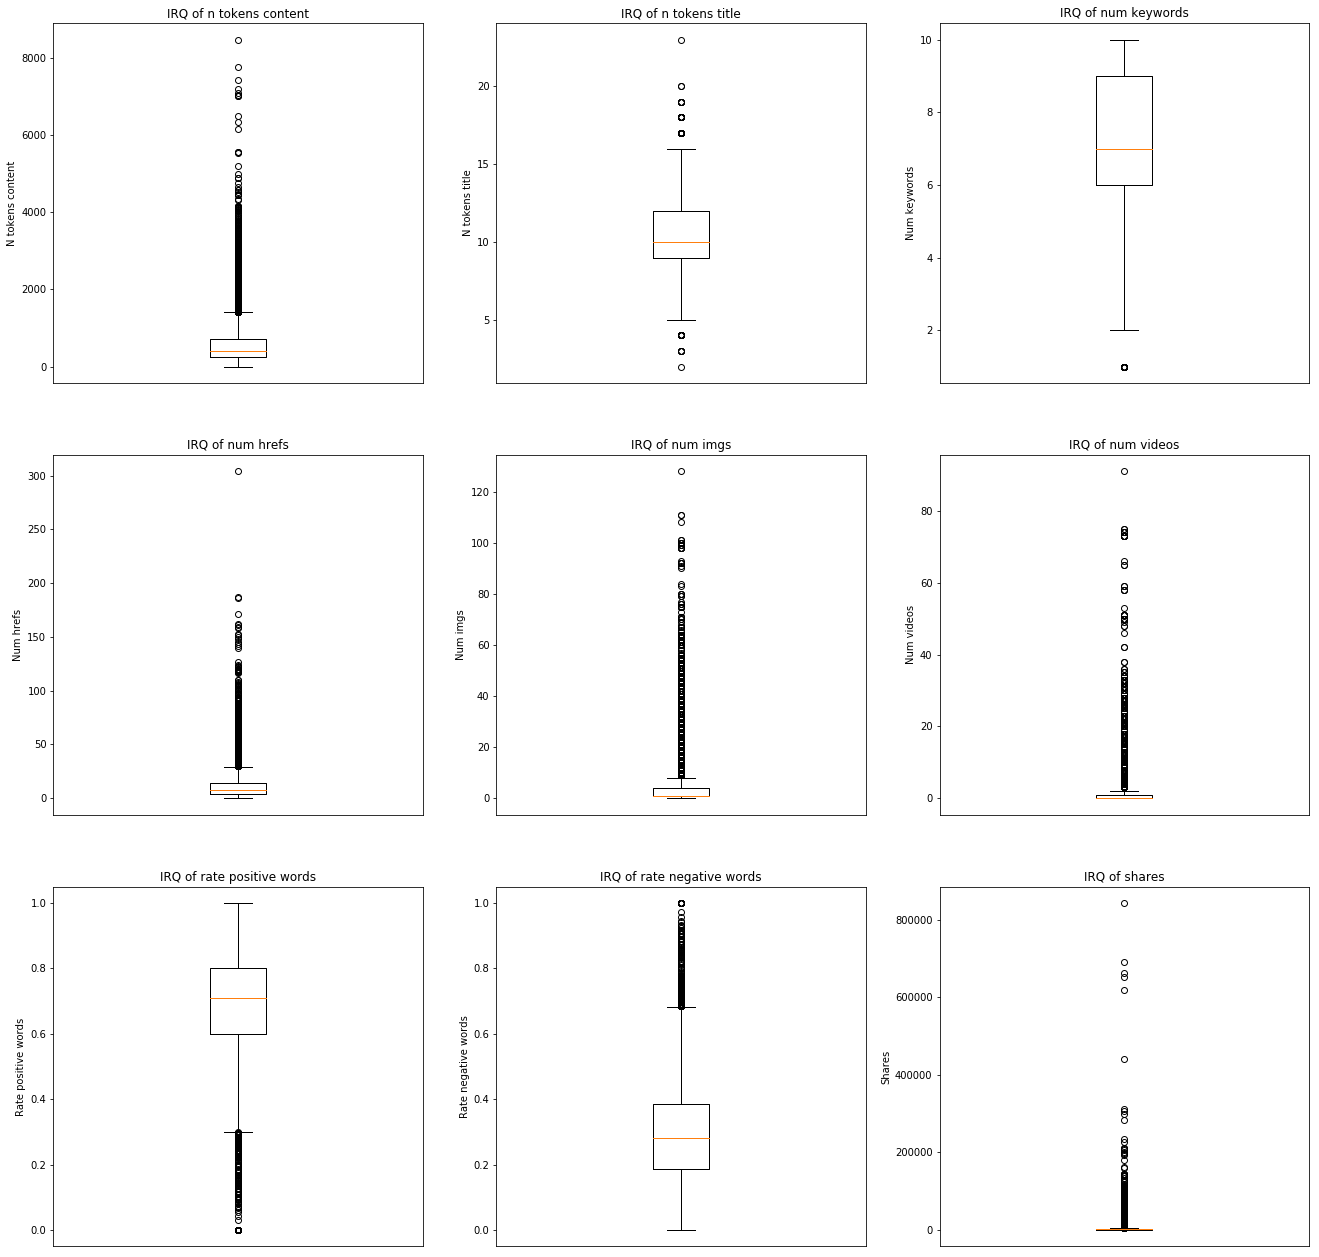

In [15]:
# Boxplots
plot_obj.set_params_idx(y=['n_tokens_content', 'n_tokens_title', 'num_keywords', 
                          'num_hrefs','num_imgs', 'num_videos', 
                          'rate_positive_words', 'rate_negative_words', 'shares'])

plot_obj.plot('BOX')

In [16]:
pd.concat([news[['article_name','channel', 'num_imgs', 'num_videos', 'num_hrefs']].sort_values(by='num_imgs', ascending=False).head(5),
             news[['article_name','channel', 'num_imgs', 'num_videos', 'num_hrefs']].sort_values(by='num_videos', ascending=False).head(5),
             news[['article_name','channel', 'num_imgs', 'num_videos', 'num_hrefs']].sort_values(by='num_hrefs', ascending=False).head(5)])

article_name        channel  \
18702                              first photobomb comic  entertainment   
24612                             joe biden commencement      lifestyle   
24802                              idina menzel decision      lifestyle   
24564  hotel association takes aim at airbnb but airb...      lifestyle   
24973                weirdest things for sale on alibaba      lifestyle   
18101                                twitter stock surge          other   
1666            will ferrell old milwaukee super bowl ad            bus   
19706                       sponsors politics sochi lgbt            bus   
12642                 bicycle powered treehouse elevator  entertainment   
12667                               brain window implant  entertainment   
39338           dueling hashtags following nypd shooting  entertainment   
17709                            white house field trips  entertainment   
38174                                princess rap battle  entertainment   
3859                                       dead twitters         socmed   
23473                     fault in our stars scene video          other   

       num_imgs  num_videos  num_hrefs  
18702     128.0        12.0       41.0  
24612     111.0         2.0       46.0  
24802     111.0         0.0        3.0  
24564     108.0         0.0       28.0  
24973     101.0         0.0        8.0  
18101       0.0        91.0      143.0  
1666        0.0        75.0        5.0  
19706       1.0        75.0       79.0  
12642       1.0        74.0       11.0  
12667       1.0        74.0       18.0  
39338       1.0         0.0      304.0  
17709      11.0         0.0      187.0  
38174       1.0         0.0      186.0  
3859        1.0         0.0      171.0  
23473      14.0         0.0      162.0

Except for the number of tokens in the title and number of keywords, all other features seem to have a high number of outliers, indicating highly skewed distributions. For example, it is clear that most articles have few hyperlinks, images or videos, but some may have more than 50 of any of these digital media types, many of which appear to be related to entertainment- or lifestyle-related news.

**Histogram**: *Histograms show the possible values of a feature and how common those values are. Histograms are useful for learning about the density or distribution of a variable.*

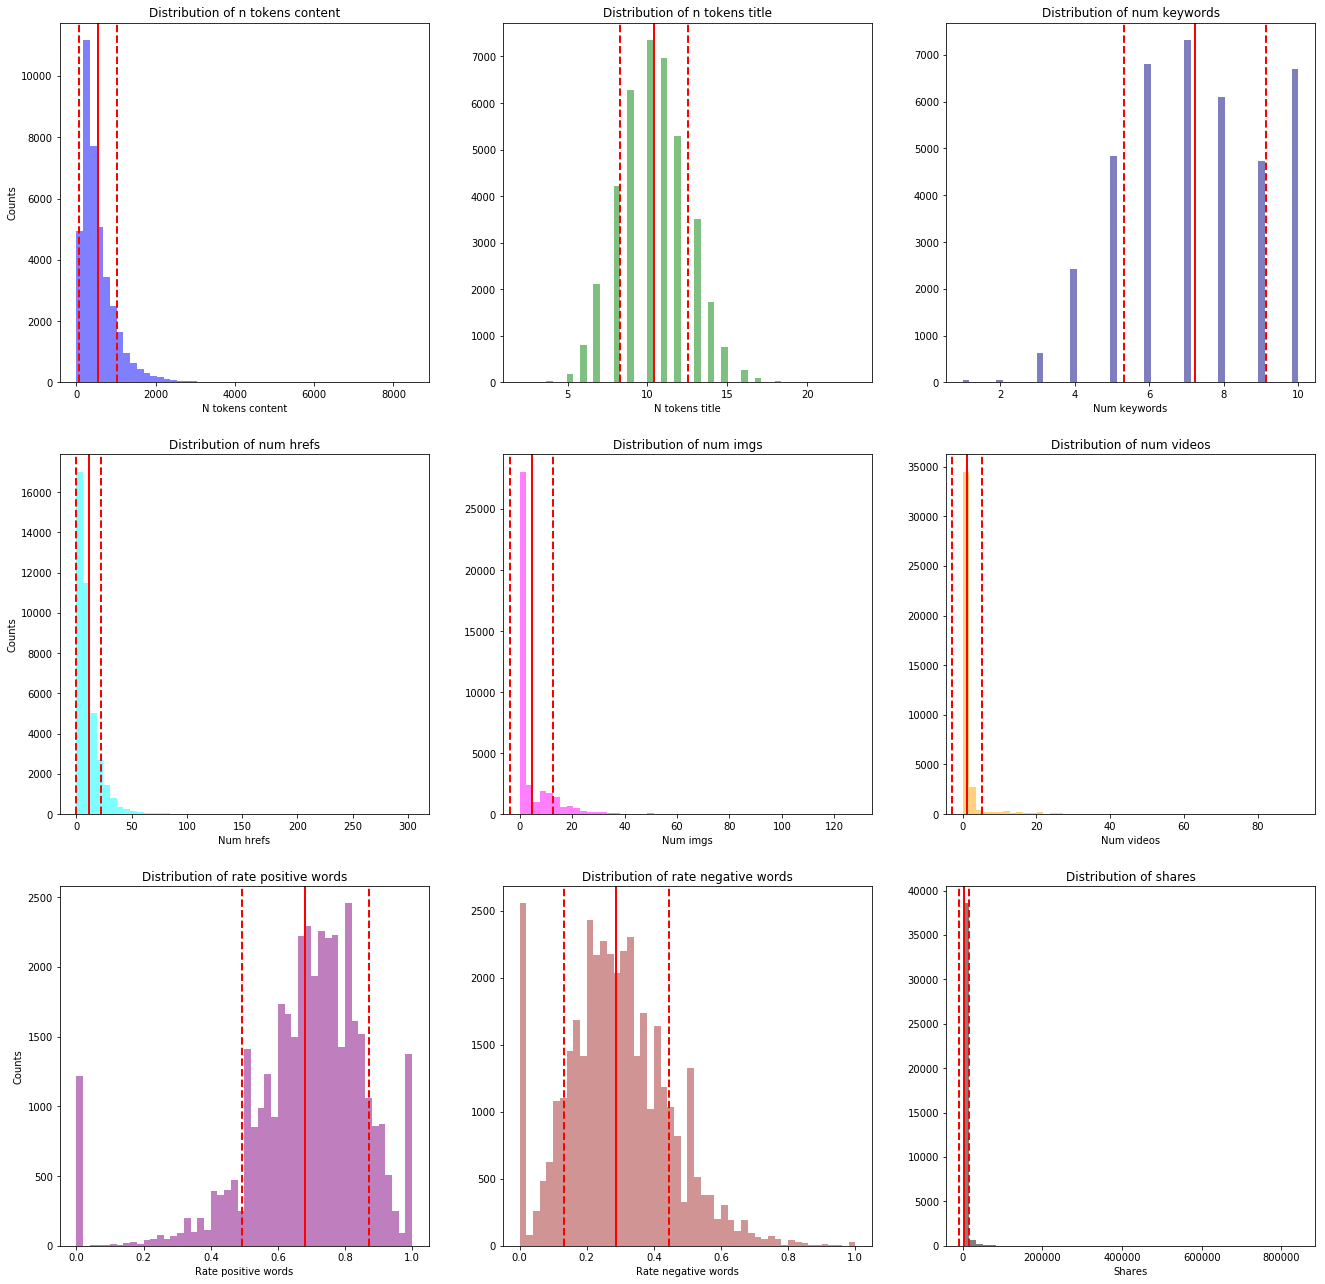

In [17]:
# Histograms
plot_obj.set_params_idx(x=['n_tokens_content', 'n_tokens_title', 'num_keywords', 
                          'num_hrefs','num_imgs', 'num_videos', 
                          'rate_positive_words', 'rate_negative_words', 'shares'], 
                        colour = ['blue', 'green', 'navy', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'black'])

plot_obj.plot('HiSt')

### 1.4 Distributions

From the histograms above it is clear that most features are sparse (with many zero values). Disregarding these 0s,
the *rate of positive and negative words* appear follow a normal (Gaussian) distribution, the *numbers of token in the title and keywords* follow a discrete count distribution and the rest of the features have a positive (right) skewed distribution. 

**QQ-plots**: *QQ-plots allow comparison of the distributions of two variables, because two similar distributions should show a linear relation between their sorted values (quantiles). As such, when comparing to a variable of known distribution, it is possible to gain insights of the distribution of an unknown variable.*

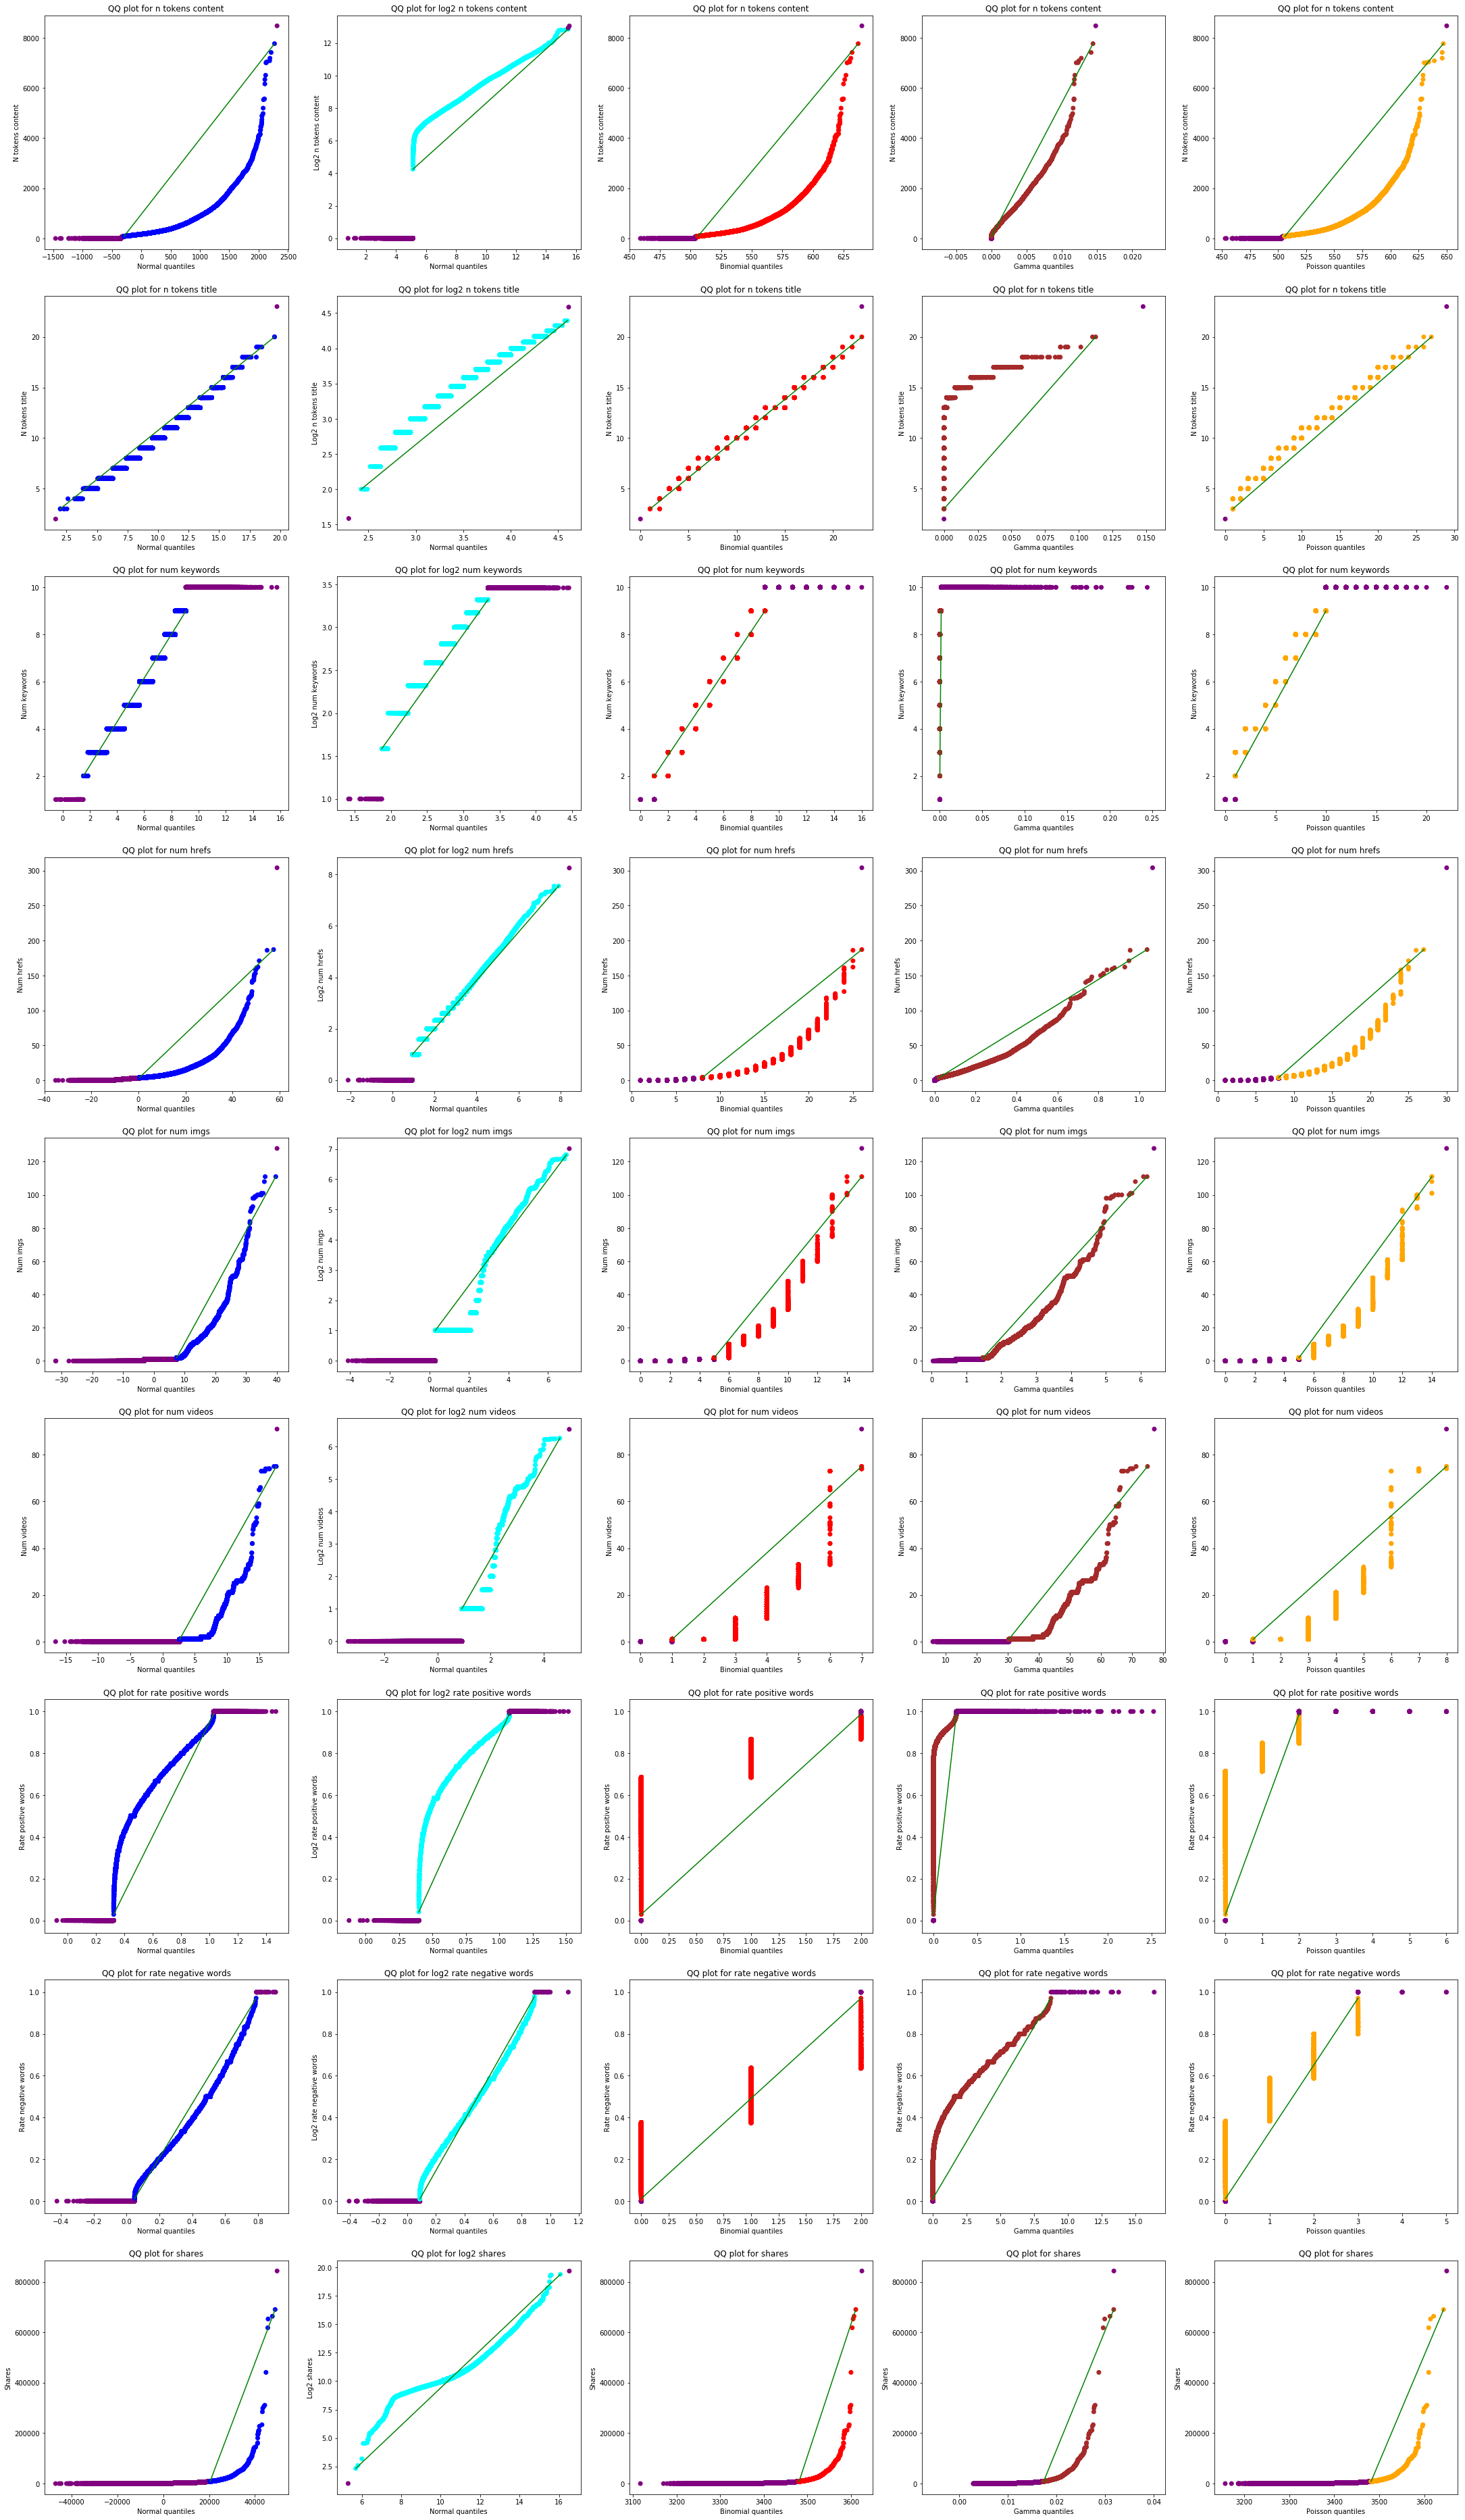

In [18]:
# QQ-plots

plot_obj.set_params_idx(x=['n_tokens_content'] * 5 + ['n_tokens_title'] * 5 + ['num_keywords'] * 5 +
                           ['num_hrefs'] * 5 + ['num_imgs'] * 5 + ['num_videos'] * 5 + 
                           ['rate_positive_words'] * 5 + ['rate_negative_words'] * 5 + ['shares'] * 5,
                       distribution = ['Normal', 'Log', 'Binomial', 'Gamma', 'Poisson'] * 9, 
                       colour = ['blue', 'cyan', 'red', 'brown', 'orange'] * 9,
                       ncols = 5)

plot_obj.plot('QQ')

The QQ-plots above show the relationship of the the data features' unknown distributions with a number of known distributions of interest. 

A variable that follows a **normal distribution** has its values clustering around the central values with a symmetrical spreading to the left and the right (resulting in a bell-shaped distribution). The *rate of negative words* seems to fit very well with this distribution, suggesting that the rate of negative words for most articles clusters around a similar value. A approximately normal distribution is also observed for *number of images and videos*. However, due to the high positive skew noticed on the histograms, the quantiles for the log-transformed (correction for positive skewed distributions) *number of images and videos* show a stronger relationship with the expected quantiles for a normal distribution. This corrective effect is more noticeable for the *number of references and shares*, which suggests that these features follow a **skewed distribution** showing asymmetric spread for values around the mode, with a median value shifted to higher values than the mean (a positive skew), which indicates that the right tail (side) is longer than expected for a normal distribution.

The *number of tokens in title and keywords* seem to fit two distributions, the binomial distribution and the Poisson distribution. The **binomial distribution** counts the number of successes when an event with two possible outcomes is repeated many times, while the **Poisson distribution** represents the number of times a given event will occur during a given time interval. Because both of these distributions represent count values, [they are related](http://www.oxfordmathcenter.com/drupal7/node/297) such that the binomial distribution for a high number of trials approaches a Poisson
distribution. Thus is it not surprising that these features can be described by both these distributions as they reflect how many time a word is in the title or is a keyword (from the total number of words).

Interestingly, the *number of tokens in the content* seem to be best approximated by a **gamma distribution**. This distribution represents the "time" (words) until an event (stop typing) and is a strongly positively skewed distribution where the event is unlikely at first (few small articles), becomes more likely with "time" (the bulk of the article will have some many words), but becomes less likely again for extreme "time" values (there are few very long articles).

The quantiles of the *rate of positive words* feature do not appear to be related to any of the distributions tested, even though the histogram suggested a possible fit to a Gaussian distribution. This would suggest that a more [complex distribution](https://www.causascientia.org/math_stat/Dists/Compendium.pdf) may better describe this feature. In addition, it is clear from the QQ-plots that many features show an unexpectedly high number of 0 values. This results in features with bounded values (showed in purple) and in truncated distributions, and it should be noticed that the previous interpretation of the QQ-plots is simplified by focusing on unbound values.

### 1.5 Quality

It's important when approaching a new data source to try to judge its objective quality. Engaging in this questioning early and explicitly will help prevent situations where the conclusions of the analysis are compromised or when poor data quality becomes the conclusion. Thus, extensive data exploration, as previously illustrated, is essential to understand and validate the data. 

There doesn't seem to be any missing values for the features considered in this report and the data does not seem to have any long-term time dependency or particular fluctuations. There are however, a high number of 0 values that may need to be accounted for at later stages of analysis and some outlier articles showing a extremely high number of shares, which correspond to specific events, the influence of which should be tested. In addition, it is worth mentioning that observed distribution of the features is as expected, with some of the rate and count features effectively approximating the normal distribution due to the large number of samples available.

## 2. Analytic questions: 

#### 2.1. Number of articles and shares per channel
The previous exploratory analysis suggests articles with shorter content are shared more often than those with longer contents. While unclassified articles (others) have on average half of the word count than the other news channels, it is the world channel that has the most number of articles, thus suggesting that there may be more interest in world-related news. **Are the proportions of published articles and shares different between the news channels?** If so, does there seem to be a relationship such that more shared channels show increased publication?

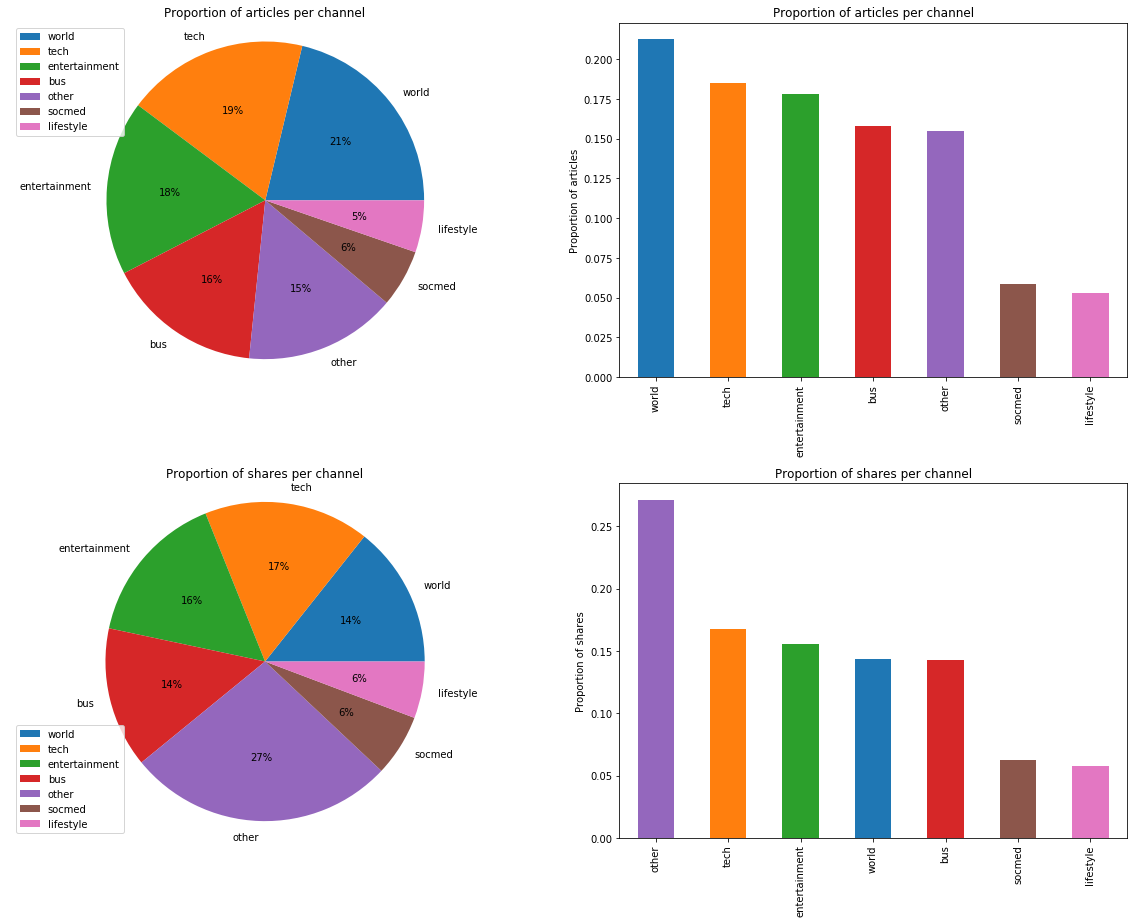

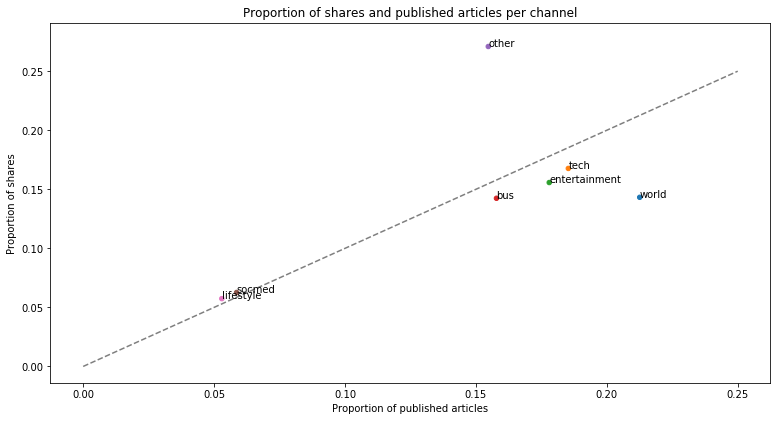

The mean difference of mean shares between unclassified and classified articles is 3016.55 corresponding to a t-test p-value of 3.24e-78.
Excluding articles shared more than 6200 times, the mean difference of mean is 278.10 corresponding to a t-test p-value of 5.96e-50.


In [19]:
## Analytic question 1 ##

# Prepare values for plotting
articles_channel = news['channel'].value_counts()
props_channel = articles_channel/len(news)

shares_channel = news.groupby('channel').sum()['shares']
props_shares = shares_channel/shares_channel.sum()
props_shares = props_shares[props_channel.index]

cols =  dict(zip(articles_channel.index,['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']))

# Two different ways to represent proportions

# Set plot grid layout
plt.figure(figsize=(20,15))
plt.tight_layout()

# Plot proportion of articles
plt.subplot(221)
props_channel.plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('Proportion of articles per channel')
plt.ylabel('')
plt.legend(articles_channel.index, loc="upper left")

plt.subplot(222)
props_channel.plot(kind='bar')
plt.title('Proportion of articles per channel')
plt.ylabel('Proportion of articles')
plt.xlabel('')

# Plot shares proportions
plt.subplot(223)
props_shares.plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('Proportion of shares per channel')
plt.ylabel('')
plt.legend(props_shares.index, loc="lower left")

plt.subplot(224)

col_prop = [cols[cat] for cat in props_shares.sort_values(ascending=False).index]

props_shares.sort_values(ascending = False).plot(kind='bar', color=col_prop)
plt.title('Proportion of shares per channel')
plt.ylabel('Proportion of shares')
plt.xlabel('')

plt.subplots_adjust(hspace = 0.3)

plt.show()

# Compare proportion of shares and articles published

combined = pd.concat([props_channel, props_shares], axis=1)
col_comb = [cols[cat] for cat in combined.index]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((1,1,1,1))

combined.plot(kind = 'scatter', x = 'channel', y='shares', color= col_comb, ax = ax)
plt.title('Proportion of shares and published articles per channel')
plt.ylabel('Proportion of shares')
plt.xlabel('Proportion of published articles')
# add annotation
for i in range(len(combined)): plt.annotate(combined.index[i], xy = (combined['channel'][i], combined['shares'][i]))
# add identity line
plt.plot((0, 0.25), (0,0.25), linestyle = '--', color='C7')
plt.show()

# Statistical test
print('The mean difference of mean shares between unclassified and classified articles is %.2f corresponding to a t-test p-value of %.2e.' % 
      (news.loc[news['channel'] == 'other', 'shares'].mean() - news.loc[news['channel'] != 'other', 'shares'].mean(),
      ttest_ind(
          news.loc[news['channel'] == 'other', 'shares'],
          news.loc[news['channel'] != 'other', 'shares']).pvalue))

print('Excluding articles shared more than %d times, the mean difference of mean is %.2f corresponding to a t-test p-value of %.2e.' % 
      (news['shares'].quantile(0.9),
       news.loc[np.logical_and(news['channel'] == 'other', news['shares'] <= news['shares'].quantile(0.9)), 'shares'].mean() - 
           news.loc[np.logical_and(news['channel'] != 'other', news['shares'] <= news['shares'].quantile(0.9)), 'shares'].mean(),
       ttest_ind(
           news.loc[np.logical_and(news['channel'] == 'other', news['shares'] <= news['shares'].quantile(0.9)), 'shares'],
           news.loc[np.logical_and(news['channel'] != 'other', news['shares'] <= news['shares'].quantile(0.9)), 'shares']).pvalue))


It is clear that the proportion of shares is highly correlated with the proportion of articles published for all news channels. The exception is the *other* category, which shows a higher proportion of shares than expected for the proportion of articles published. Statistical analysis suggests a highly significant difference of the mean number of shares for *other* articles. However, the *other* channel includes 3 of the 10 most shared articles, which could be influencing the results. The exclusion of the 10% most shared articles, greatly reduced the observed mean difference of shares. This seems to confirm that a significant proportion of the highly shared articles are indeed from the unclassified news channels. The reduced number of articles published without channel tag may reflect its lack of defined theme. Consistently, it is possible that these articles are special issues, thus more focused on the reader's interest, which would result in more shares. It is, however, unclear what these "special" articles are and why their channel type was missing to start with.

#### 2.2 Words subjective value
News articles that were shared the most also show a rate of positive words on average higher than that of negative words. This would suggest that people tend to share more positive news. However, there seems to be a general trend of articles having less negative words. **Are articles with more positive words than negative words really more shared?**

There are 2987 negative articles and 34347 positive articles


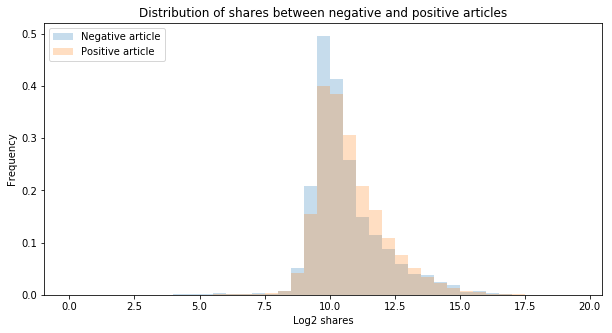

The mean difference of mean shares between positive and negative articles is 328.98 corresponding to a t-test p-value of 1.39e-01.


In [20]:
## Analytic question 2 ##

# Prepare values for plotting
negative_articles = news[news['rate_negative_words'] > news['rate_positive_words']]
positive_articles = news[news['rate_negative_words'] < news['rate_positive_words']]

print('There are %d negative articles and %d positive articles' % (len(negative_articles), len(positive_articles)))
      
         
# Overlap distributions
plt.figure(figsize=(10,5))
plt.tight_layout()

np.log2(negative_articles['shares']).plot(kind = 'hist', density = True, alpha=0.25, bins=np.arange(0,20,0.5))
np.log2(positive_articles['shares']).plot(kind = 'hist', density = True, alpha=0.25, bins=np.arange(0,20,0.5))
plt.title('Distribution of shares between negative and positive articles')
plt.xlabel('Log2 shares')
plt.legend(['Negative article', 'Positive article'], loc="upper left")

plt.show()

# Statistical test
print('The mean difference of mean shares between positive and negative articles is %.2f corresponding to a t-test p-value of %.2e.' % 
      (positive_articles['shares'].mean() - negative_articles['shares'].mean(),
      ttest_ind(positive_articles['shares'], negative_articles['shares']).pvalue))

Interestingly, there are much more positive articles (those with higher rate of positive words than negative words) than negative articles, resulting in a highly unbalanced dataset. From the histogram representation of the density (proportion within the feature) of the log2 shares for each type of article, the distribution of shares is similar for both positive and negative articles, but the positive articles are slightly more skewed to more shares. The statistical analysis finds that there is a probability of 13.9% of obtaining similar or more extreme result, if no difference in mean shares exists between positive and negative articles, thus the observed differences are not statistically significant even at a level of 10%.

#### 2.3 Weekly cycle

When comparing the number of shares with the date of publication, there was no obvious long-term temporal trends, for example, more news articles are shared in a specific month. However, smaller time scales, such as the day of the week in which the article is published, may be hidden by the much larger scale (2 years) of the previous analysis. It could be that news articles are more shared during particular days of the week, but not at particular months of the year. **Is there any evidence of small-scale temporal preference for article sharing?**

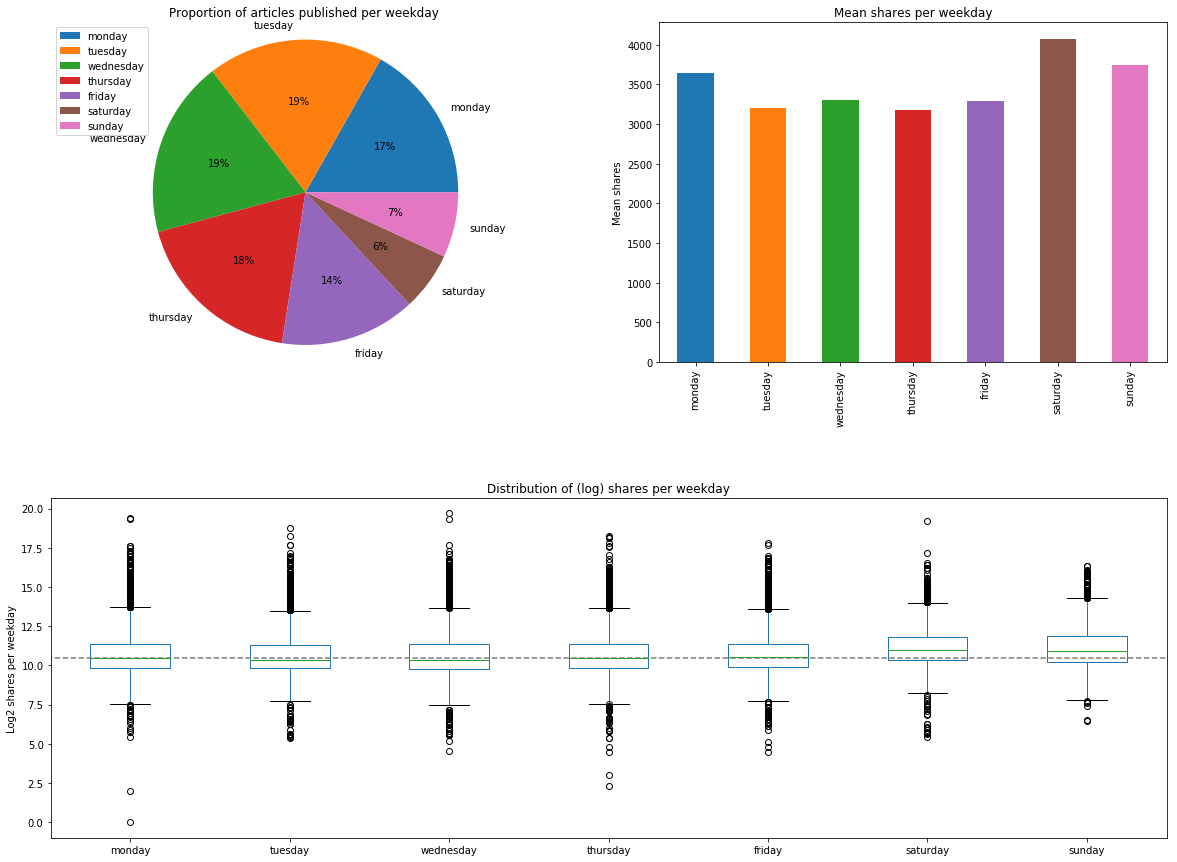

The mean difference of mean shares for articles published between weekend and weekdays is 663.19 corresponding to a t-test p-value of 7.34e-04.


In [21]:
## Analytic question 3 ##

# Prepare values for plotting
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

number_weekday = news['weekday'].value_counts()
shares_weekday = news.groupby('weekday').aggregate(np.mean)['shares'].sort_values()

number_weekday = number_weekday[days]
shares_weekday = shares_weekday[days]


# Set plot grid layout
fig = plt.figure(figsize=(20,15))
plt.tight_layout()

# Distribution of articles per weekday
plt.subplot(221)
number_weekday.plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title('Proportion of articles published per weekday')
plt.ylabel('')
plt.legend(number_weekday.index, loc="upper left")

# Total of shares per weekday
plt.subplot(222)
shares_weekday.plot(kind='bar')
plt.title('Mean shares per weekday')
plt.ylabel('Mean shares')
plt.xlabel('')


# Distribution of shares per weekday
ax = fig.add_subplot(212)
np.log2(news.pivot(columns='weekday', values='shares')[days]).plot(kind='box', ax=ax)
plt.title('Distribution of (log) shares per weekday')
plt.ylabel('Log2 shares per weekday')
plt.xlabel('')

plt.subplots_adjust(hspace = 0.4)
plt.plot((0, 8), 
         (np.log2(news.loc[news['weekday']=='monday', 'shares']).median(),np.log2(news.loc[news['weekday']=='monday', 'shares']).median()), 
         linestyle = '--', color='C7')
plt.show()

# Statistical test
print('The mean difference of mean shares for articles published between weekend and weekdays is %.2f corresponding to a t-test p-value of %.2e.' % 
      (news.loc[np.isin(news['weekday'], ['saturday', 'sunday']), 'shares'].mean() - news.loc[np.isin(news['weekday'], ['saturday', 'sunday', 'monday'], invert = True), 'shares'].mean(),
      ttest_ind(
          news.loc[np.isin(news['weekday'], ['saturday', 'sunday']), 'shares'],
          news.loc[np.isin(news['weekday'], ['saturday', 'sunday'], invert = True), 'shares']).pvalue))


Even though the data of publication did not reveal any obvious temporal trend, when analysing the weekday of publication, it is clear that articles published during the weekend (and possibly Monday) have proportionally much more shares. A mean difference of 663.19 of additional citations during the weekend was found significant, even though these articles correspond only to 13% of all the published articles. 

## 3. Further research
In this report, a number of factors that are associated with on-line news popularity, as measured by number of times an article is shared, were identified. Particularly, popularity of an on-line news article seems to increase with:

  * smaller contents, 
  * higher number of keywords,
  * little to no digital content or hyperlinks,
  * publication during the weekend,
  * not assigned to a specific channel.

Further research to **understand how each of these factors weights in the popularity** of an on-line news article would allow for a better understanding of the key characteristics of a popular article. Supervised methods, such as regression could be used to reveal the influence each factor has on the expected number of shares. In addition, the fact that unassigned articles have higher proportion of shares, could suggest that different channels have different article characteristics which could their affect popularity. **Identifying potential differences in articles from different channels** and how these may affect popularity is also fundamental to understand if an underlying *style* leads to popular articles regardless of the subject or if different thematics make use of different styles to produce popular news articles. Unsupervised methods, such as clustering, can provide a better understanding of the similarities within and between news channels, and how these correlate with popularity.

In [22]:
#### Session notes
%load_ext version_information
%version_information pandas, numpy, matplotlib, scipy, IPython

Software versions
Python 3.6.7 64bit [GCC 8.2.0]
IPython 6.5.0
OS Linux 4.15.0 39 generic x86_64 with Ubuntu 18.04 bionic
pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
scipy 1.1.0
IPython 6.5.0
Fri Nov 30 11:15:34 2018 GMT